<a href="https://colab.research.google.com/github/beesaprathyusha20/Deep-Learning/blob/main/KerasCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape),print(y_train.shape),print(x_test.shape),print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(None, None, None, None)

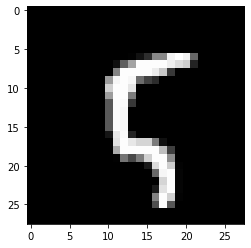

In [5]:
from matplotlib import image 
image_index = 100
plt.imshow(x_train[image_index],cmap='gray')
plt.show()

In [6]:
#reshaping the dataset
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
#data scaling and normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255-0.5
x_test /=255-0.5

In [9]:
#creating a sequential model for CNN
num_filters = 8
filter_size = 3
pool_size = 2
model = Sequential()
model.add(Conv2D(num_filters,filter_size,strides=(1,1),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 8) dtype=float32, numpy=
 array([[[[ 0.16332817,  0.15163401, -0.05651912, -0.01735789,
           -0.22826259, -0.03229243, -0.14071995,  0.14696309]],
 
         [[ 0.23371005, -0.18840492, -0.16530912,  0.13344267,
            0.05776253,  0.19241664, -0.23306006,  0.20065081]],
 
         [[-0.2019965 , -0.25013223,  0.04087391, -0.13283487,
           -0.04539254,  0.17236784, -0.15971708, -0.09649633]]],
 
 
        [[[-0.04677455, -0.00290465,  0.19670978,  0.07960188,
            0.11935899, -0.14105979,  0.03173703,  0.07975832]],
 
         [[ 0.18676594,  0.21811885, -0.17636931,  0.01504895,
            0.15274227,  0.03847936,  0.00533521,  0.15596578]],
 
         [[-0.04417016,  0.17323756,  0.26173365,  0.16346705,
            0.24155444, -0.20963761, -0.23045728,  0.12223527]]],
 
 
        [[[-0.05265379,  0.00585082, -0.00622171, -0.09900559,
            0.1796008 ,  0.1354185 ,  0.03860193,  0.15061   ]],
 
         [[

In [13]:
#compiling the model
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,to_categorical(y_train),epochs=3,verbose=1,validation_data=(x_test,to_categorical(y_test)),)

Epoch 1/3
1875/1875 [==============================] - 14s 3ms/step - loss: 0.3447 - accuracy: 0.9026 - val_loss: 0.2194 - val_accuracy: 0.9372
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1917 - accuracy: 0.9460 - val_loss: 0.1549 - val_accuracy: 0.9548
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1406 - accuracy: 0.9605 - val_loss: 0.1195 - val_accuracy: 0.9635


In [14]:
score = model.evaluate(x_test,to_categorical(y_test),verbose=0)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

Test Loss: 0.11951442807912827
Test Accuracy: 0.9635000228881836


In [15]:
#predicting the first 5 images
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 88ms/step


In [16]:
print(np.argmax(predictions,axis=1))
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]
